In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shutil
from glob import glob
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from ipywidgets import interact, fixed

%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']  # 解决中文显示问题
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题

In [ ]:
axisfiles = glob("../datas/AxisData/*.csv")

for file in axisfiles:
    # 创建临时文件路径
    temp_file = file + ".tmp"
    
    with open(file, 'r') as f1, open(temp_file, 'w') as f2:
        r = f1.read()
        r_new = r.replace(',0,0,0,0,', ',0,0,0,0')
        f2.write(r_new)
        
    # 用临时文件替换原文件
    shutil.move(temp_file, file)

In [46]:
# 1. 加载数据文件 (假设文件在当前目录)
axis_data = pd.read_csv('../datas/AxisData/2025-06-28.csv')
camera_data = pd.read_csv('../datas/CameraCheck/_2025_06_28.csv')
cytime_data = pd.read_csv('../datas/CyTime/2025-06-28.csv')
lightcontrol_data = pd.read_csv('../datas/LightControlCheck/2025_06_28.csv')
# lightcontrol_data = pd.read_csv('../datas/LightControlCheck/2025_06_28.csv')
warnlog_data = pd.read_csv('../datas/报警记录/2025-06-28.csv', encoding='gbk')

In [47]:
cytime_data

,Time,Cyl[1].WP_Time,Cyl[2].WP_Time,Cyl[3].WP_Time,Cyl[4].WP_Time,Cyl[5].WP_Time,Cyl[6].WP_Time,Cyl[7].WP_Time,Cyl[8].WP_Time,Cyl[9].WP_Time,...,Vac[1]_Time,Vac[2]_Time,Vac[3]_Time,Vac[4]_Time,Vac[5]_Time,Vac[6]_Time,Vac[7]_Time,Vac[8]_Time,Vac[9]_Time,Vac[10]_Time
0,00:50:07 469,0.62957,0.91080,0.61527,0.40514,0.18692,0.81140,0.18898,0.71560,0.42299,...,0.0,0.0,0.0,0.0,0.84602,NaN,0.592960,NaN,NaN,NaN
1,01:50:07 435,0.62957,0.91080,0.61527,0.40514,0.18692,0.81140,0.18898,0.71560,0.42299,...,0.0,0.0,0.0,0.0,0.84602,NaN,0.592960,NaN,NaN,NaN
2,02:50:07 311,0.62957,0.91080,0.61527,0.40514,0.18692,0.81140,0.18898,0.71560,0.42299,...,0.0,0.0,0.0,0.0,0.84602,NaN,0.592960,NaN,NaN,NaN
3,03:50:07 275,0.62957,0.91080,0.61527,0.40514,0.18692,0.81140,0.18898,0.71560,0.42299,...,0.0,0.0,0.0,0.0,0.84602,NaN,0.592960,NaN,NaN,NaN
4,04:50:07 216,0.62957,0.91080,0.61527,0.40514,0.18692,0.81140,0.18898,0.71560,0.42299,...,0.0,0.0,0.0,0.0,0.84602,NaN,0.592960,NaN,NaN,NaN
5,05:50:07 156,0.62957,0.91080,0.61527,0.40514,0.18692,0.81140,0.18898,0.71560,0.42299,...,0.0,0.0,0.0,0.0,0.84602,NaN,0.592960,NaN,NaN,NaN
6,06:50:07 086,0.62957,0.91080,0.61527,0.40514,0.18692,0.81140,0.18898,0.71560,0.42299,...,0.0,0.0,0.0,0.0,0.84602,NaN,0.592960,NaN,NaN,NaN
7,07:50:07 087,0.62957,0.91080,0.61527,0.40514,0.18692,0.81140,0.18898,0.71560,0.42299,...,0.0,0.0,0.0,0.0,0.84602,NaN,0.592960,NaN,NaN,NaN
8,08:50:07 024,0.62927,0.91171,0.61539,0.40532,0.18694,0.81202,0.23015,0.71656,0.42321,...,0.0,0.0,0.0,0.0,0.84568,NaN,1.136871,NaN,NaN,NaN
9,09:50:07 002,0.62921,0.91209,0.61567,0.40550,0.18718,0.81410,0.19516,0.72071,0.42342,...,0.0,0.0,0.0,0.0,0.85769,NaN,0.829911,NaN,NaN,NaN


Text(0.5, 1.0, 'axis_data 相关性热图')

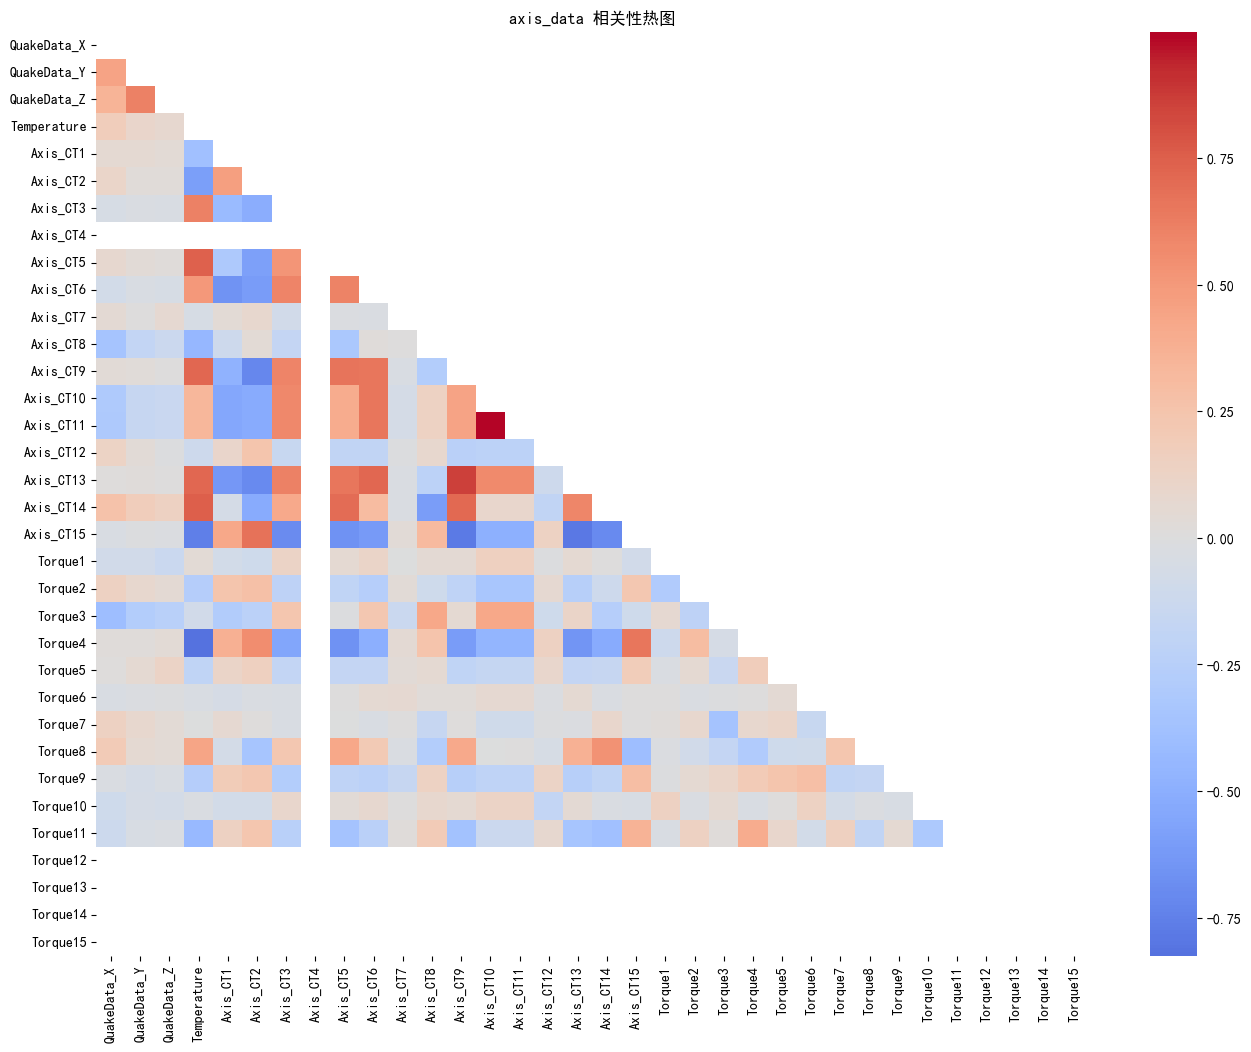

In [40]:
# 3. 相关性分析
# 该列存在部分未解析数据
axis_data['Torque6'] = axis_data['Torque6'].apply(eval)
# 轴数据分析
plt.figure(figsize=(16, 12))
corr = axis_data[axis_data.columns[1:]].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=False, cmap='coolwarm', center=0)
plt.title('axis_data 相关性热图')

Text(0.5, 1.0, 'cy_time 相关性热图')

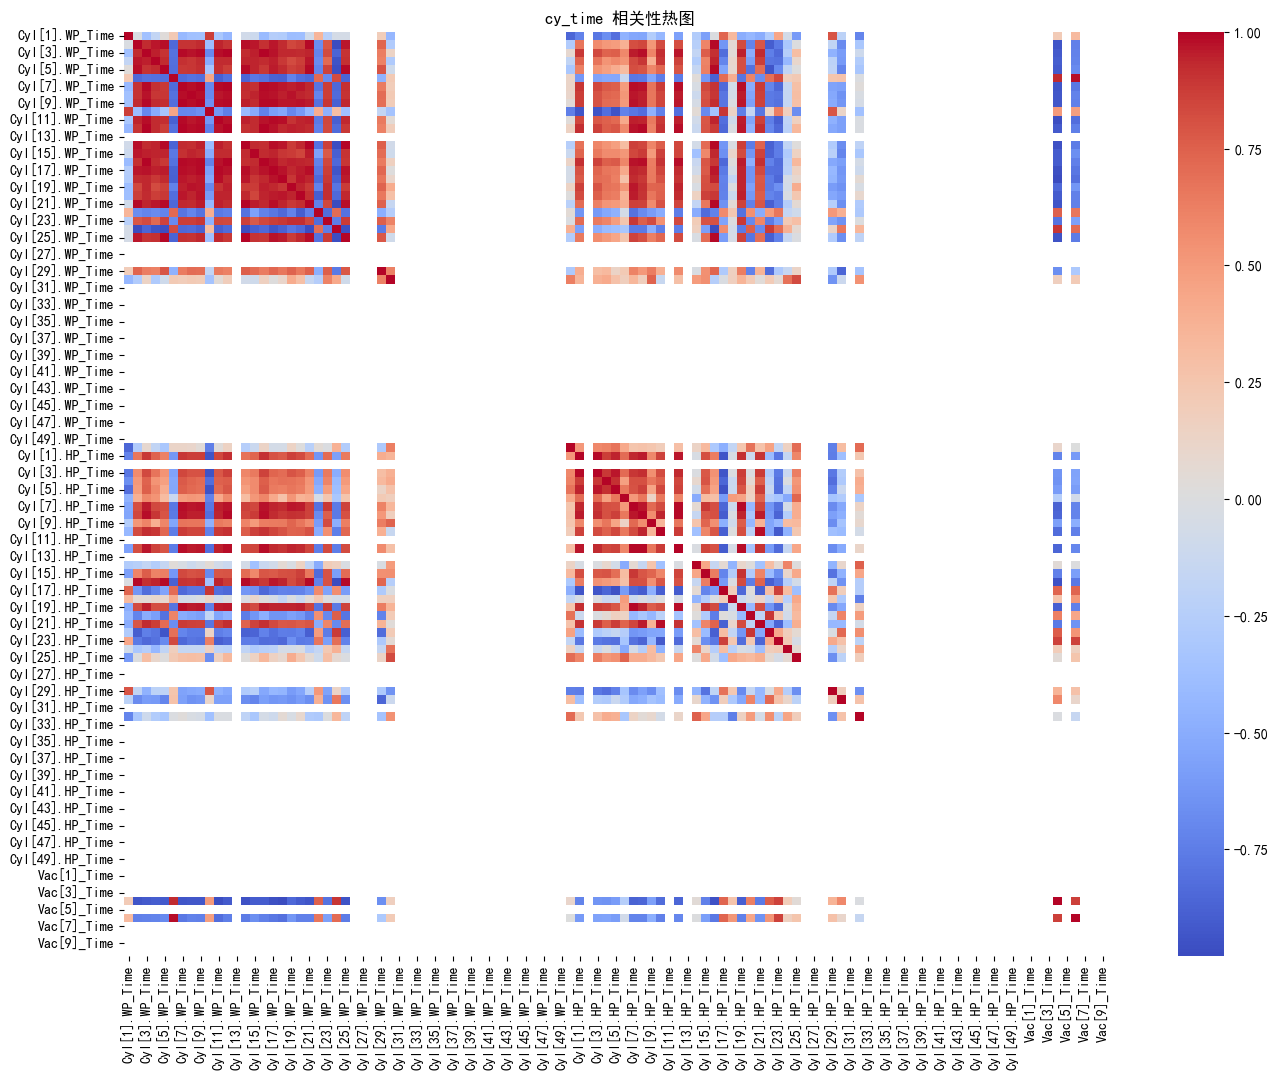

In [41]:
# 时间序列数据分析 (cy_time)
plt.figure(figsize=(16, 12))
sns.heatmap(cytime_data[cytime_data.columns[1:]].corr(), annot=False, cmap='coolwarm')
plt.title('cy_time 相关性热图')

In [44]:
# 4. 文件间关联性分析
# 将时间列转换为统一格式
axis_data['time'] = pd.to_datetime(axis_data['time'], format='%H:%M:%S').dt.time
# cytime_data['time'] = cytime_data['time'].str[:8]
cytime_data['Time'] = pd.to_datetime(cytime_data['Time'], format='%H:%M:%S').dt.time

# 可视化不同文件的时间序列数据
plt.figure(figsize=(15, 10))
plt.subplot(211)
axis_data.iloc[:, 1:].plot(alpha=0.6)
plt.title('axis_data 时间序列')
plt.legend().remove()

plt.subplot(212)
cytime_data.iloc[:, 2:].plot(alpha=0.6)
plt.title('cy_time 时间序列')
plt.legend().remove()
plt.tight_layout()

ValueError: time data "0" doesn't match format "%H:%M:%S", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [ ]:
# 5. 报警事件与轴数据关联分析
# 获取报警开始时间
alarm_times = pd.to_datetime(warnlog_data['开始时间']).dt.time

# 在轴数据中标记报警事件
axis_data['Alarm'] = axis_data['time'].isin(alarm_times).astype(int)

In [ ]:
time_threshold = pd.Timedelta(seconds=10)  # 时间窗口阈值
# 报警期间的特征变化
alarm_features = axis_data.groupby('Alarm').mean().T.reset_index()

plt.figure(figsize=(14, 8))
plt.subplot(121)
sns.barplot(x='Alarm', y=0, data=alarm_features.iloc[1:51], color='skyblue', alpha=0.7)
plt.title('报警时气缸特征变化')
plt.ylabel('平均值')

plt.subplot(122)
sns.barplot(x='Alarm', y=0, data=alarm_features.iloc[51:], color='salmon', alpha=0.7)
plt.title('报警时真空特征变化')
plt.ylabel('平均值')
plt.tight_layout()

In [ ]:

# 6. 温度和振动分析
plt.figure(figsize=(12, 6))
sns.lineplot(data=cytime_data, x='time', y='Temperature', label='温度')
plt.title('温度随时间变化')
plt.xticks(rotation=45)
plt.savefig('temperature_trend.png', bbox_inches='tight')
plt.close()

plt.figure(figsize=(12, 6))
for col in ['QuakeData_X', 'QuakeData_Y', 'QuakeData_Z']:
    sns.lineplot(data=cytime_data, x='time', y=col, label=col)
plt.title('振动传感器数据')
plt.xticks(rotation=45)
plt.savefig('vibration_data.png', bbox_inches='tight')
plt.close()

# 7. 特征工程与深度分析
# 添加时间特征
axis_data['Hour'] = pd.to_datetime(axis_data['Time'], format='%H:%M:%S').dt.hour
cytime_data['Hour'] = pd.to_datetime(cytime_data['time'], format='%H:%M:%S').dt.hour

# 按小时聚合分析
hourly_axis = axis_data.groupby('Hour').mean().iloc[:, :-2]
hourly_cy = cytime_data.groupby('Hour').mean().iloc[:, :-1]

plt.figure(figsize=(16, 12))
plt.subplot(211)
sns.heatmap(hourly_axis.T, cmap='viridis')
plt.title('气缸数据小时平均')

plt.subplot(212)
sns.heatmap(hourly_cy.T.iloc[:20], cmap='coolwarm')
plt.title('传感器数据小时平均')
plt.tight_layout()
plt.savefig('hourly_averages.png', bbox_inches='tight')
plt.close()

print("分析完成! 所有图表已保存为图像文件")